# Preamble

This is based on the COSMOS real galaxy set https://zenodo.org/record/3242143#.Yfz17Lso8vg

In [87]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import glob
import fitsio as fio


# Loading a single image

In [29]:
directory_path = "/e/ocean1/users/vargatn/HST_galaxy/COSMOS_23.5_training_sample/"

all_files = np.sort(glob.glob(directory_path + "/real*fits"))


In [30]:
fname_master = directory_path + "real_galaxy_catalog_23.5.fits"

In [31]:
master = fio.read(fname_master)

In [70]:
fname = directory_path + master[0]["GAL_FILENAME"] # the image file name is stored in column 6 of the table
data = fio.read(fname, ext=master[0]["GAL_HDU"]) # the actual file extension within the file is stored in column 8

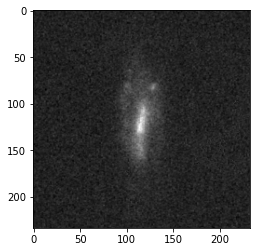

In [71]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.imshow(data, cmap="gray")

# Loading multiple images

## linear image scaling

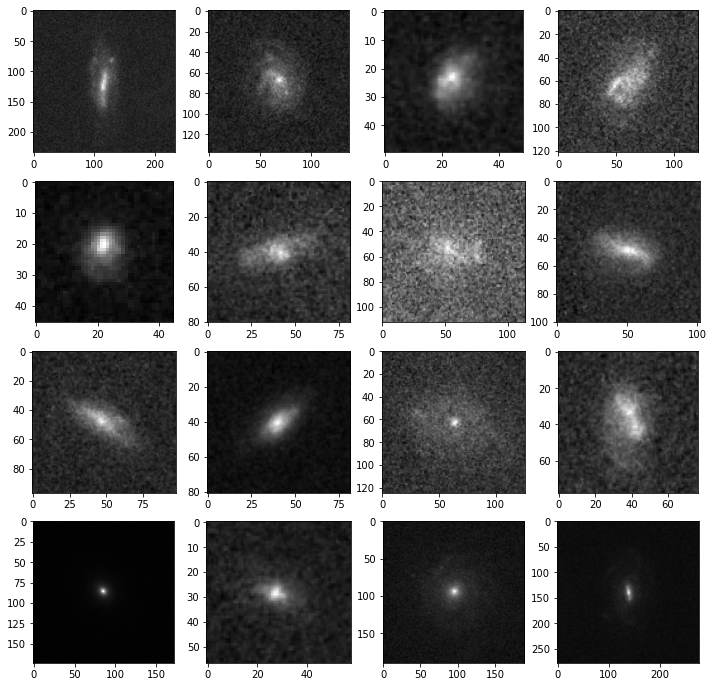

In [72]:
fig, axarr = plt.subplots(nrows=4, ncols=4, figsize=(12, 12))
faxarr = axarr.flatten()

for i in np.arange(16):
    fname = directory_path + master[i]["GAL_FILENAME"] # the image file name is stored in column 6 of the table
    im = fio.read(fname, ext=master[i]["GAL_HDU"]) # the actual file extension within the file is stored in column 8
    
    faxarr[i].imshow(im, cmap="gray")


## Arcsinh image scaling

In [73]:
def ascale(imr, nonlinear):
    """based on https://github.com/esheldon/desimage/blob/master/desimage/images.py"""
    colorim = np.zeros(imr.shape)
    nrows, ncols = im.shape
    for row in range(nrows):
        for col in range(ncols):
            rval = imr[row, col]

            if rval < 0.0:
                rval = 0.0

            # average images and divide by the nonlinear factor
            meanval = rval
            scaled_image = meanval / nonlinear  # noqa

            if scaled_image <= 0.0:
                scaled_image = 1.0 / 3.0

            f = np.arcsinh(scaled_image) / scaled_image

            if (rval * f > 1):
#                 maxval = max(rval, gval, bval)
#                 if maxval > 0.0:
                f = 1.0 / rval

            colorim[row, col] = rval * f

    return colorim

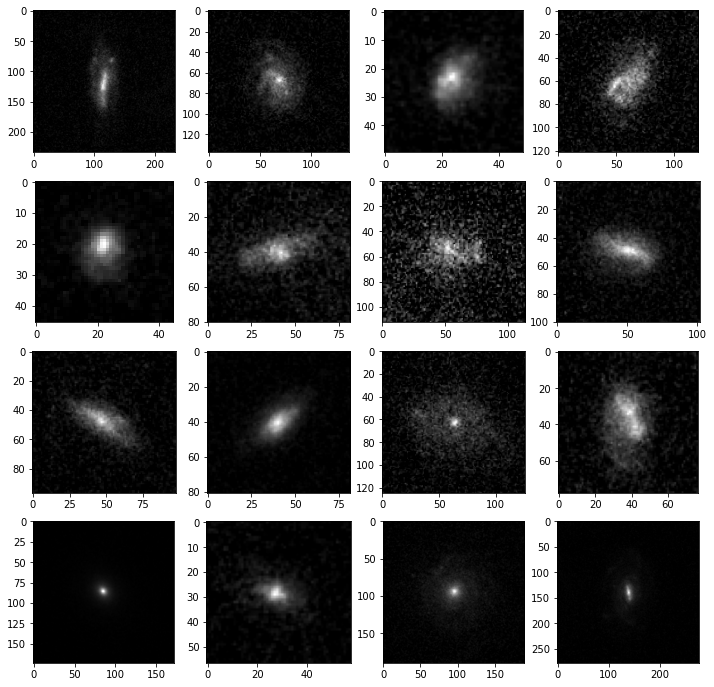

In [74]:
fig, axarr = plt.subplots(nrows=4, ncols=4, figsize=(12, 12))
faxarr = axarr.flatten()

for i in np.arange(16):
    fname = directory_path + master[i]["GAL_FILENAME"] # the image file name is stored in column 6 of the table
    im = fio.read(fname, ext=master[i]["GAL_HDU"]) # the actual file extension within the file is stored in column 8
    
    
#     im =  np.arcsinh(im) / im
    im = ascale(im, 1)
    faxarr[i].imshow(im, cmap="gray")

# Let's look at the brightest galaxies

In [82]:
ids = np.argsort(master["MAG"])[:16] # query the 16 brightest galaxies in the catalog
for i, irow in enumerate(ids):
    fname = directory_path + master[irow]["GAL_FILENAME"] # the image file name is stored in column 6 of the table
    im = fio.read(fname, ext=master[irow]["GAL_HDU"]) # the actual file extension within the file is stored in column 8


In [89]:
ids = np.argsort(master["MAG"])[:16] # query the 16 brightest galaxies in the catalog


<ipython-input-95-94a0c13325d5>:14: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig("COSMOS_bright_galaxies.png", bbox="inches", dpi=300)


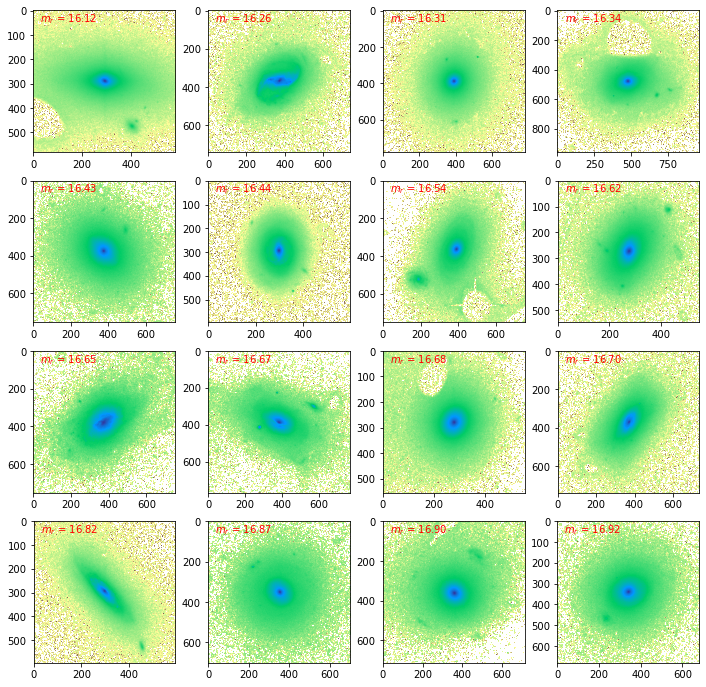

In [95]:
fig, axarr = plt.subplots(nrows=4, ncols=4, figsize=(12, 12))
faxarr = axarr.flatten()
ids = np.argsort(master["MAG"])[:16] # query the 16 brightest galaxies in the catalog
for i, irow in enumerate(ids):
    fname = directory_path + master[irow]["GAL_FILENAME"] # the image file name is stored in column 6 of the table
    im = fio.read(fname, ext=master[irow]["GAL_HDU"]) # the actual file extension within the file is stored in column 8

#     im =  np.arcsinh(im) / im
#     im = ascale(im, 0.12)
    faxarr[i].imshow(im, cmap="terrain_r", norm=mpl.colors.LogNorm())
    faxarr[i].text(0.05, 0.92, "$m_r$ = {:.2f}".format(master[irow]["MAG"]),
                   color="red", transform=faxarr[i].transAxes)    
    
fig.savefig("COSMOS_bright_galaxies.png", bbox_inhce="inches", dpi=300)